# Graphs

In this jupyter notebook the necessary code to run the graphs will be found. 

## Imports

The code snippet sets up an environment for network analysis and visualization by installing necessary libraries (`matplotlib` and `scapy`) and importing essential modules for data handling, plotting, and network packet manipulation. It imports standard libraries such as `ast`, `ipaddress`, `json`, `numpy`, `pandas`, and `re`, as well as custom modules for specialized packet headers (`EPHeader`) and routing information (`MRI`). Additionally, it configures a colormap (`Set2`) from `matplotlib` for consistent and visually appealing plots. 

In [4]:
!pip install matplotlib
!pip3 install scapy

import ast
import ipaddress
import json
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import re
from io import StringIO
from scapy.all import *
from time import sleep
from utils.EPHeader import *
from utils.MRI import *
import pandas as pd
from scapy.all import Ether
import numpy as np
cmap = plt.get_cmap('Set2')

## Number of packets in the buffer of each switch

In [33]:
experiments = {"exp21" : None, "exp22" : None, "exp23" : None, "exp24" : None, "exp25" : None, "exp26" : None, "exp27" : None, "exp28" : None}

for experiment in experiments:
    df = pd.read_csv(f'./graphs/iperf/{experiment}.csv')
    hex_list = df['Values'].tolist()
    max_buffer1 = 200
    max_buffer2 = 100
    packet_numbers = [int(packet[-2:], 16) for packet in hex_list]
    max_value = max(packet_numbers)
    sorted_array = [-1] * (max_value + 1)
    for number in packet_numbers:
        sorted_array[number] = number
    qdepth_values_swid_1 = [max_buffer1 if x == -1 else None for x in sorted_array]
    #qdepth_values_swid_2 = [None for x in sorted_array]
    qdepth_values_swid_2 = [max_buffer2 if x == -1 else None for x in sorted_array]
    for index, pkt in enumerate(hex_list):
        if sorted_array[int(pkt[-2:], 16)] != -1:
            packet_bytes = bytes.fromhex(pkt)
            packet_reconstructed = Ether(packet_bytes)
            mri_layer = packet_reconstructed.getlayer(IPOption_MRI)
            qdepth_value_swid_1 = None
            qdepth_value_swid_2 = None
            if mri_layer:
                for sw_trace in mri_layer.swtraces:
                    if sw_trace.swid == 1:
                        qdepth_value_swid_1 = sw_trace.qdepth
                    elif sw_trace.swid == 2:
                        qdepth_value_swid_2 = sw_trace.qdepth
    
            if qdepth_value_swid_1 is not None:
                qdepth_values_swid_1[int(pkt[-2:], 16)] = qdepth_value_swid_1
            #if qdepth_value_swid_2 is not None:
                qdepth_values_swid_2[int(pkt[-2:], 16)] = qdepth_value_swid_2
    data = {
        'QDepth_SWID_1': qdepth_values_swid_1,
        'QDepth_SWID_2': qdepth_values_swid_2
    }
    
    experiments[experiment] =  pd.DataFrame(data)

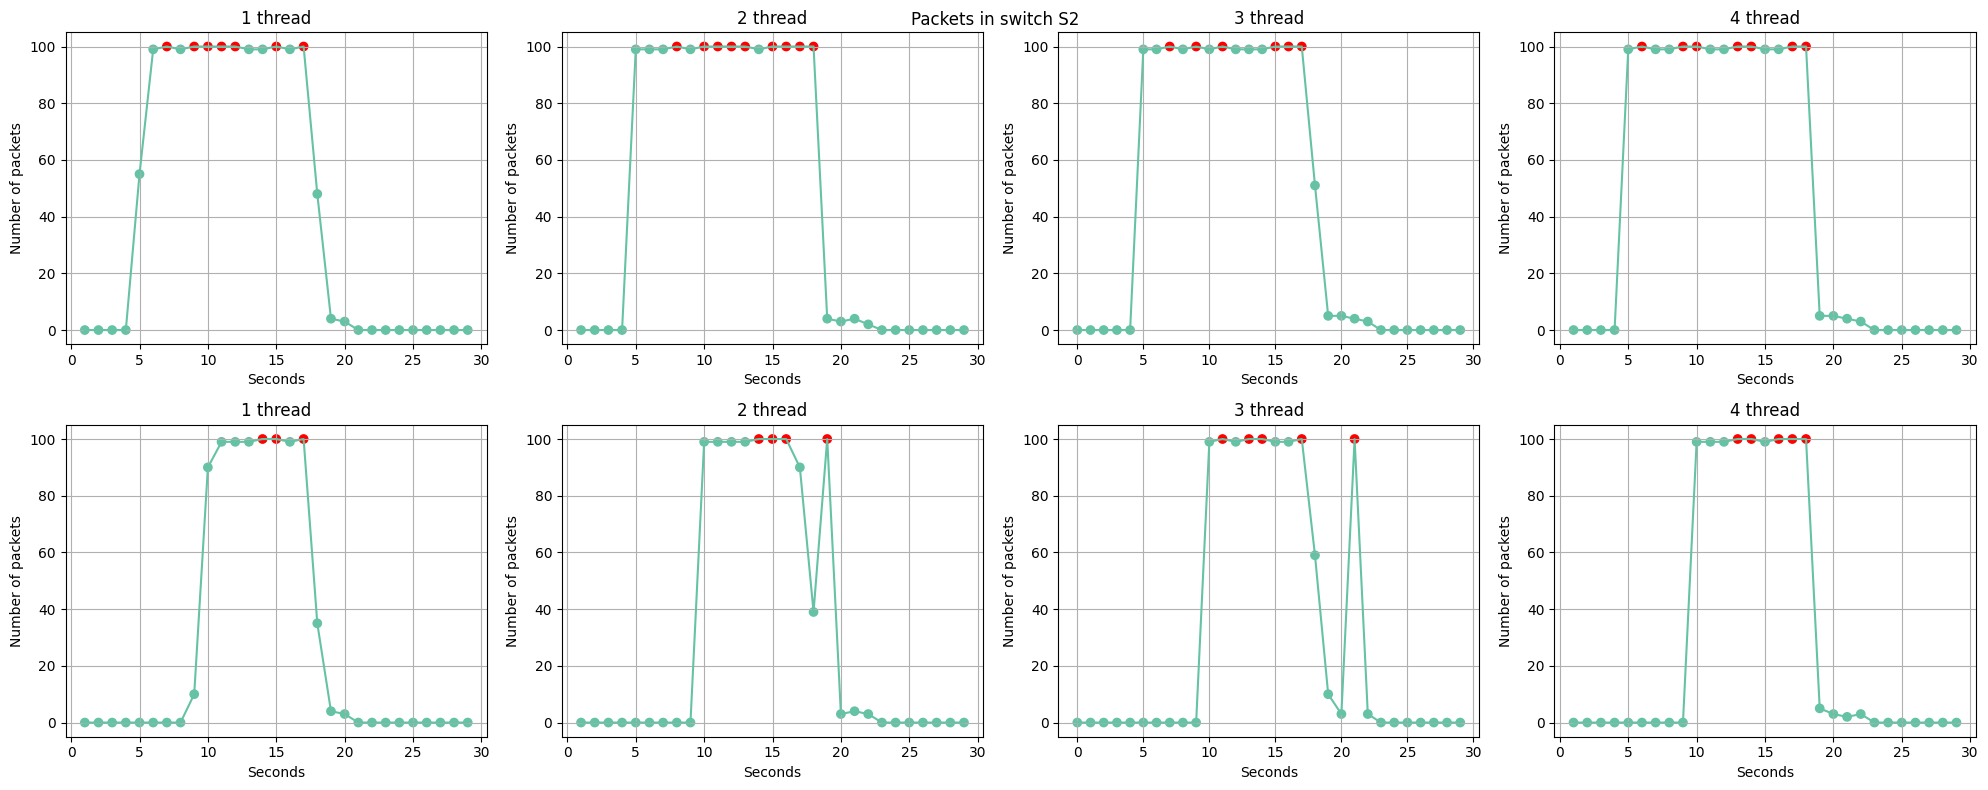

In [34]:
plt.figure(figsize=(20, 8))
swidSwitch = "QDepth_SWID_2"

plt.subplot(2,4,1)
result_df = experiments["exp21"][1:]
colors = ["red" if val == max_buffer2 else cmap(0) for val in result_df[f'{swidSwitch}']]
packet_numbers = result_df.index
plt.plot(packet_numbers, result_df[f'{swidSwitch}'], label=f'{swidSwitch}',color=cmap(0))
plt.scatter(packet_numbers, result_df[f'{swidSwitch}'], c=colors, label=f'{swidSwitch}', marker='o')

plt.xlabel('Seconds')
plt.ylabel('Number of packets')
plt.title('1 thread')
plt.grid(True)

plt.subplot(2,4,2)
result_df = experiments["exp22"][1:]
colors = ["red" if val == max_buffer2 else cmap(0) for val in result_df[f'{swidSwitch}']]
packet_numbers = result_df.index
plt.scatter(packet_numbers, result_df[f'{swidSwitch}'], c=colors, label=f'{swidSwitch}', marker='o')
plt.plot(packet_numbers, result_df[f'{swidSwitch}'], label=f'{swidSwitch}',color=cmap(0))
plt.xlabel('Seconds')
plt.ylabel('Number of packets')
plt.title('2 thread')
plt.grid(True)

plt.subplot(2,4,3)
result_df = experiments["exp23"]
colors = ["red" if val == max_buffer2 else cmap(0) for val in result_df[f'{swidSwitch}']]
packet_numbers = result_df.index
plt.scatter(packet_numbers, result_df[f'{swidSwitch}'], c=colors, label=f'{swidSwitch}', marker='o')
plt.plot(packet_numbers, result_df[f'{swidSwitch}'], label=f'{swidSwitch}',color=cmap(0))
plt.xlabel('Seconds')
plt.ylabel('Number of packets')
plt.title('3 thread')
plt.grid(True)

plt.subplot(2,4,4)
result_df = experiments["exp24"][1:]
colors = ["red" if val == max_buffer2 else cmap(0) for val in result_df[f'{swidSwitch}']]
packet_numbers = result_df.index
plt.scatter(packet_numbers, result_df[f'{swidSwitch}'], c=colors, label=f'{swidSwitch}', marker='o')
plt.plot(packet_numbers, result_df[f'{swidSwitch}'], label=f'{swidSwitch}',color=cmap(0))
plt.xlabel('Seconds')
plt.ylabel('Number of packets')
plt.title('4 thread')
plt.grid(True)

plt.subplot(2,4,5)
result_df = experiments["exp25"][1:]
colors = ["red" if val == max_buffer2 else cmap(0) for val in result_df[f'{swidSwitch}']]
packet_numbers = result_df.index
plt.scatter(packet_numbers, result_df[f'{swidSwitch}'], c=colors, label=f'{swidSwitch}', marker='o')
plt.plot(packet_numbers, result_df[f'{swidSwitch}'], label=f'{swidSwitch}',color=cmap(0))
plt.xlabel('Seconds')
plt.ylabel('Number of packets')
plt.title('1 thread')
plt.grid(True)

plt.subplot(2,4,6)
result_df = experiments["exp26"][1:]
colors = ["red" if val == max_buffer2 else cmap(0) for val in result_df[f'{swidSwitch}']]
packet_numbers = result_df.index
plt.scatter(packet_numbers, result_df[f'{swidSwitch}'], c=colors, label=f'{swidSwitch}', marker='o')
plt.plot(packet_numbers, result_df[f'{swidSwitch}'], label=f'{swidSwitch}',color=cmap(0))
plt.xlabel('Seconds')
plt.ylabel('Number of packets')
plt.title('2 thread')
plt.grid(True)

plt.subplot(2,4,7)
result_df = experiments["exp27"]
colors = ["red" if val == max_buffer2 else cmap(0) for val in result_df[f'{swidSwitch}']]
packet_numbers = result_df.index
plt.scatter(packet_numbers, result_df[f'{swidSwitch}'], c=colors, label=f'{swidSwitch}', marker='o')
plt.plot(packet_numbers, result_df[f'{swidSwitch}'], label=f'{swidSwitch}',color=cmap(0))
plt.xlabel('Seconds')
plt.ylabel('Number of packets')
plt.title('3 thread')
plt.grid(True)

plt.subplot(2,4,8)
result_df = experiments["exp28"][1:]
colors = ["red" if val == max_buffer2 else cmap(0) for val in result_df[f'{swidSwitch}']]
packet_numbers = result_df.index
plt.scatter(packet_numbers, result_df[f'{swidSwitch}'], c=colors, label=f'{swidSwitch}', marker='o')
plt.plot(packet_numbers, result_df[f'{swidSwitch}'], label=f'{swidSwitch}',color=cmap(0))
plt.xlabel('Seconds')
plt.ylabel('Number of packets')
plt.title('4 thread')
plt.grid(True)

plt.tight_layout()
plt.suptitle('Packets in switch S2')
plt.savefig('./graphs/figures/QDepth_exp20_S2.png')
plt.show()

## Bandwidth over time of each experiment

In [35]:
experiments = {"exp21" : None, "exp22" : None, "exp23" : None, "exp24" : None, "exp25" : None, "exp26" : None, "exp27" : None, "exp28" : None}
for experiment in experiments:
    with open(f'./graphs/iperf/{experiment}.json') as f:
        data = json.load(f)
    intervals = data['intervals']
    times = []
    bandwidths = []
    num_threads = []
    streams = data['end']['streams']
    lost_percent = []
    for i, interval in enumerate(intervals):
        times.append(i+1)
        bandwidths.append(interval['sum']['bits_per_second'])
        num_threads.append(data["start"]["test_start"]["num_streams"])
        
    data = {
        'times': times,
        'bandwidths': bandwidths,
        'num_threads': num_threads,
    }
    experiments[experiment] =  pd.DataFrame(data)


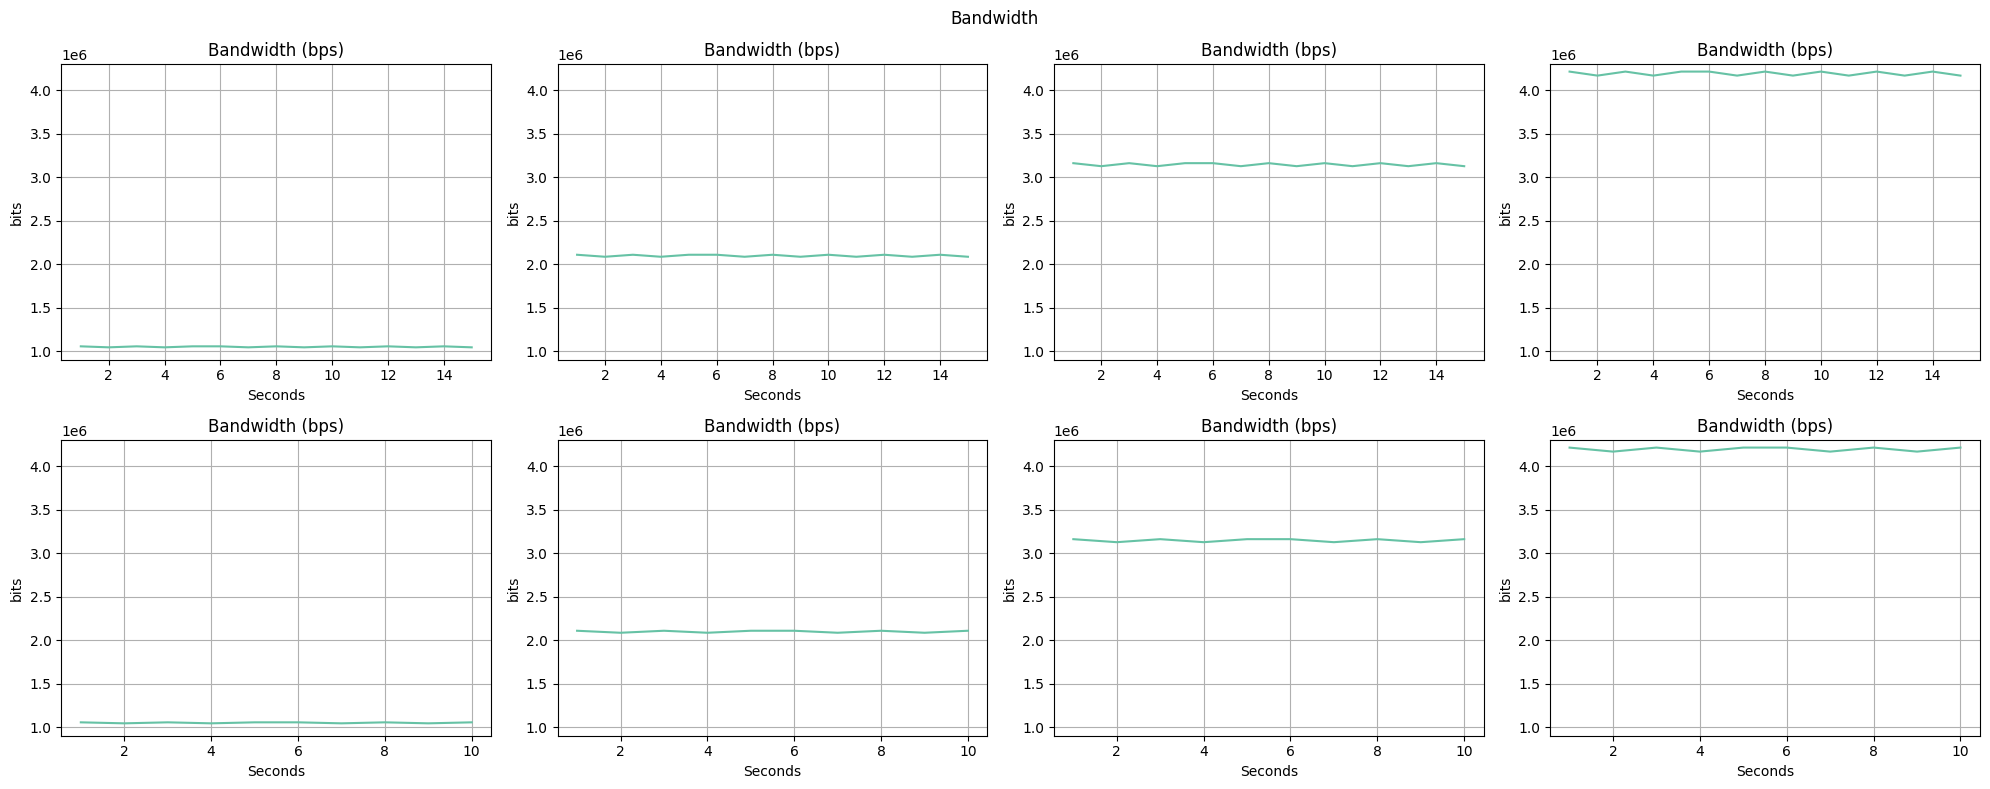

In [36]:
plt.figure(figsize=(20, 8))

for n in range(1,9):
    plt.subplot(2,4,n)
    result_df = experiments[f"exp2{n}"]
    plt.plot(result_df["times"], result_df["bandwidths"], linestyle='-', color=cmap(0))
    plt.title('Bandwidth (bps)')
    plt.xlabel('Seconds')
    plt.ylabel('bits')
    plt.ylim([0.9e6,4.3e6])
    plt.grid(True)

plt.suptitle('Bandwidth')
plt.tight_layout()
plt.savefig('./graphs/figures/BW_exp20.png')
plt.show()

## Bandwidth vs the number of threads

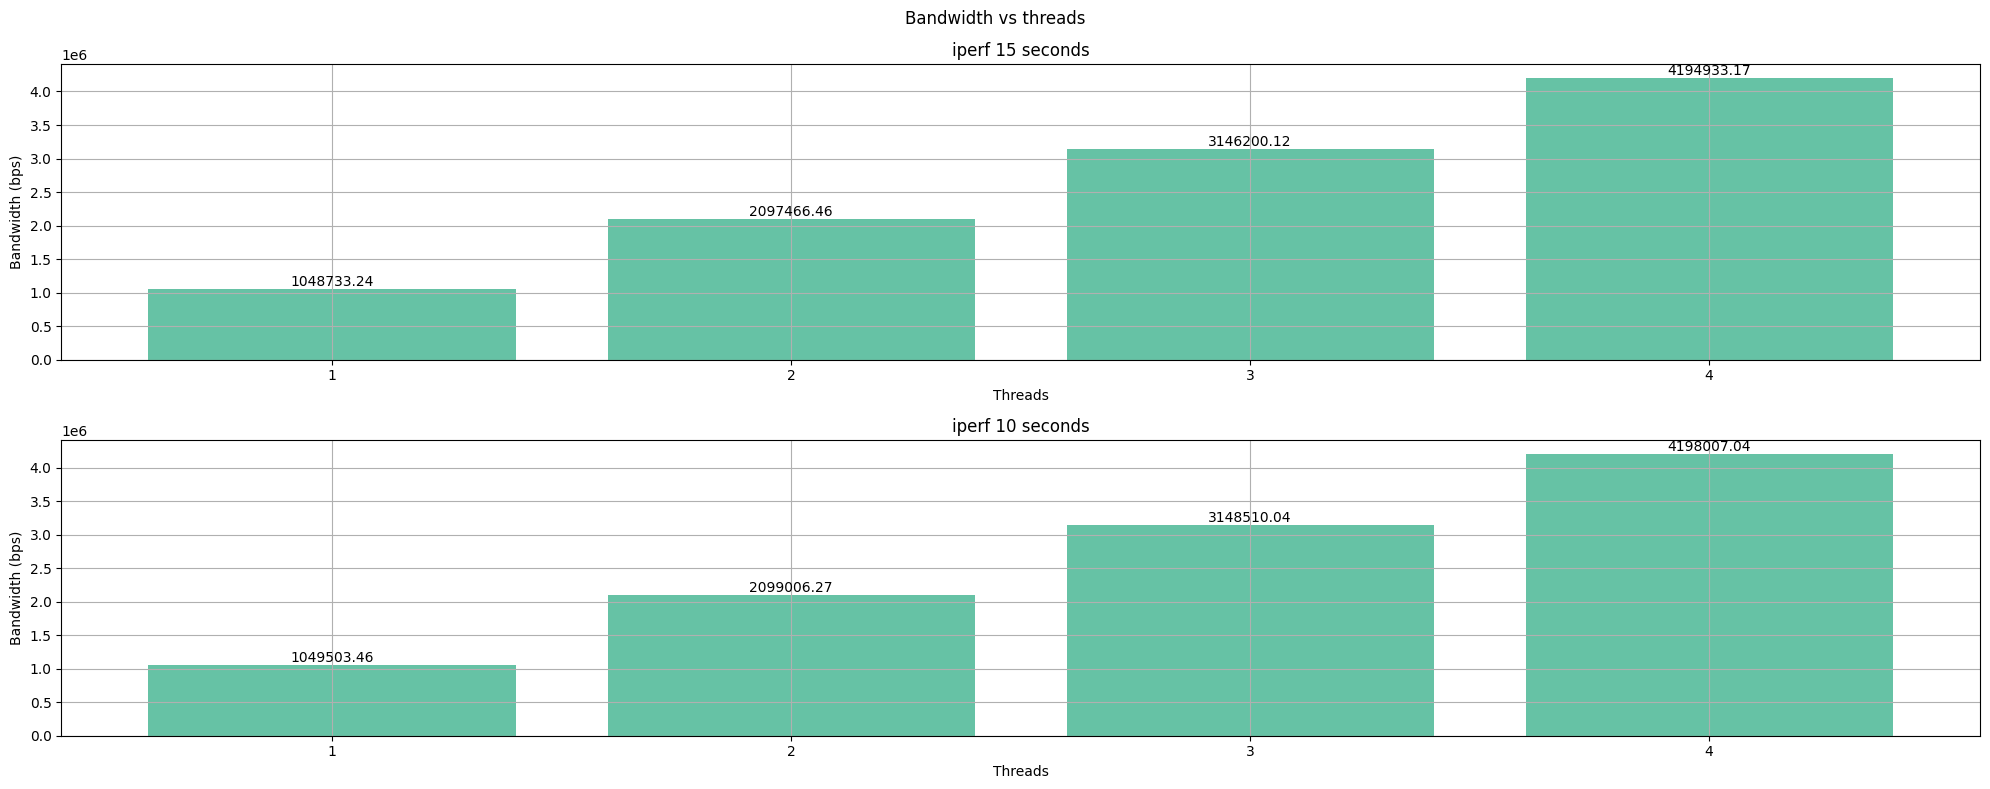

In [37]:
plt.figure(figsize=(20, 8))

plt.subplot(2,1,1)
for i in range(1,5):
    result_df = experiments[f"exp2{i}"]
    plt.bar(i, np.mean(result_df["bandwidths"]), linestyle='-', color=cmap(0))
    plt.text(i, np.mean(result_df["bandwidths"]), f'{np.mean(result_df["bandwidths"]):.2f}', ha='center', va='bottom')
plt.xticks([1,2,3,4])
plt.grid(True)
plt.title('iperf 15 seconds')
plt.xlabel('Threads')
plt.ylabel('Bandwidth (bps)')


plt.subplot(2,1,2)
for i in range(5,9):
    result_df = experiments[f"exp2{i}"]
    plt.bar(i-4, np.mean(result_df["bandwidths"]), linestyle='-', color=cmap(0))
    plt.text(i-4, np.mean(result_df["bandwidths"]), f'{np.mean(result_df["bandwidths"]):.2f}', ha='center', va='bottom')
plt.xticks([1,2,3,4])
plt.grid(True)
plt.title('iperf 10 seconds')
plt.xlabel('Threads')
plt.ylabel('Bandwidth (bps)')

plt.suptitle('Bandwidth vs threads')
plt.tight_layout()
plt.savefig('./graphs/figures/BW-T_exp20.png')
plt.show()

## Lost Packets per thread

In [5]:
experiments = {"exp21" : None, "exp22" : None, "exp23" : None, "exp24" : None, "exp25" : None, "exp26" : None, "exp27" : None, "exp28" : None}
for experiment in experiments:
    with open(f'./graphs/iperf/{experiment}.json') as f:
        data = json.load(f)
    streams = data['end']['streams']
    lost_packets = []
    packets = []
    for i, streams in enumerate(streams):
        lost_packets.append(streams['udp']['lost_packets'])
        packets.append(streams['udp']['packets'])
    data = {
        'lost_packets': lost_packets,
        'packets': packets
    }
    experiments[experiment] =  pd.DataFrame(data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


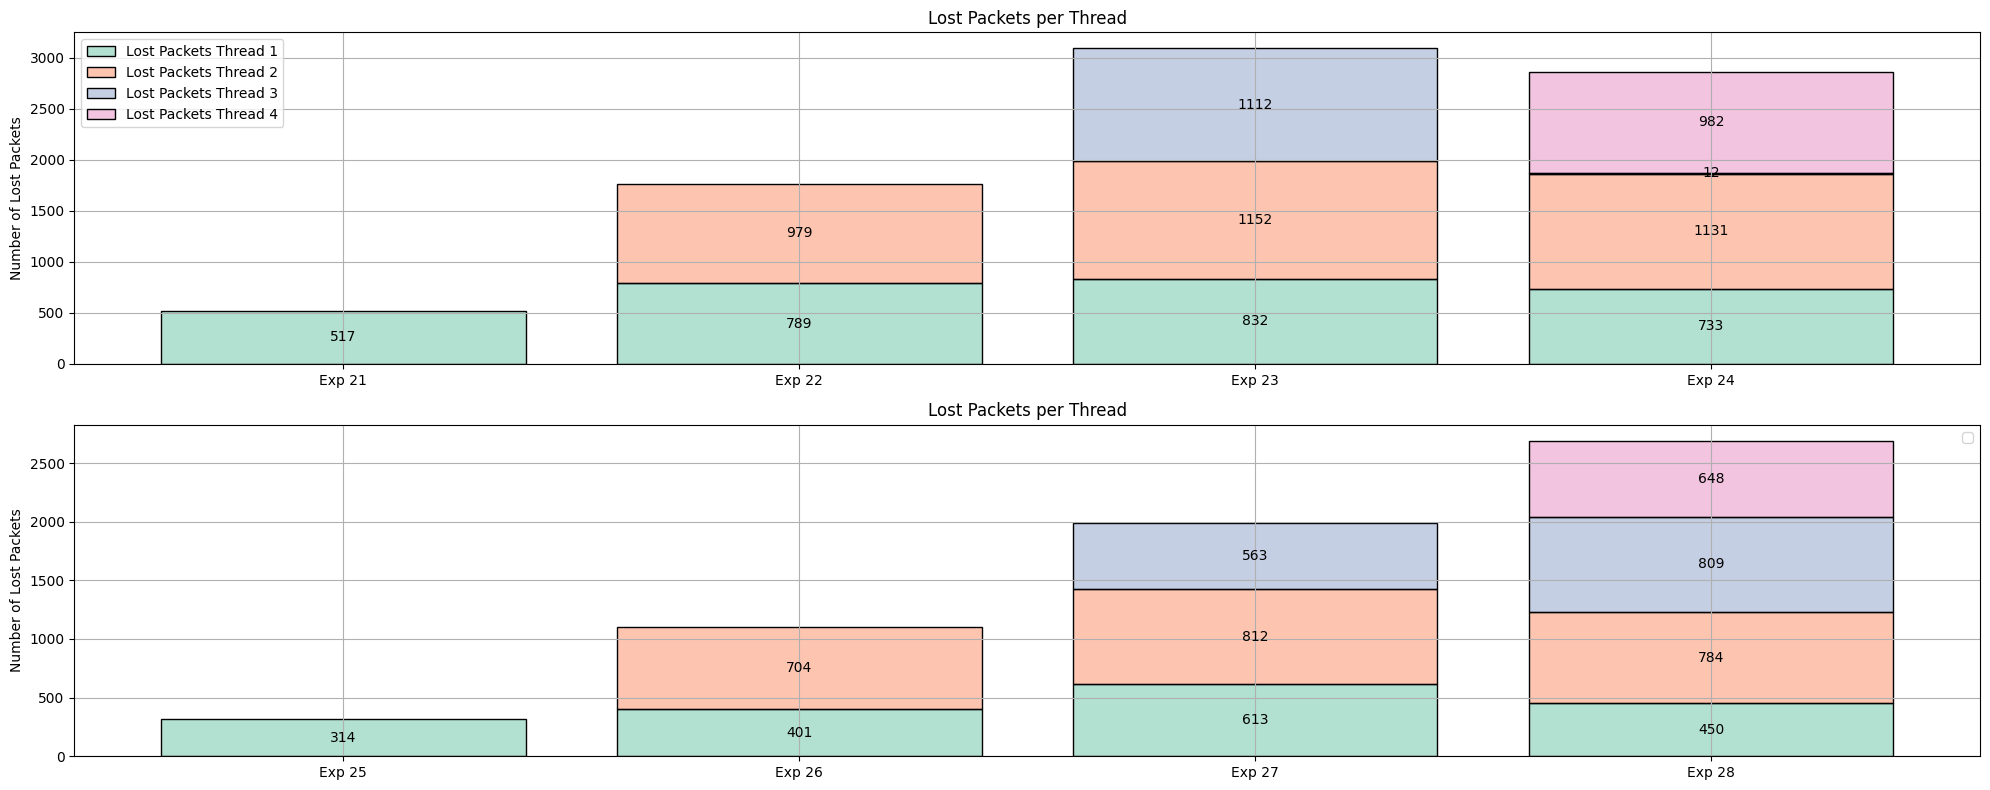

In [6]:
def add_alpha(color, alpha=0.7):
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = mcolors.to_rgba(c)
    return (c[0], c[1], c[2], alpha)

cmap = plt.get_cmap('Set2')

plt.figure(figsize=(20, 8))

legend_labels = set()

plt.subplot(2, 1, 1)
for i in range(1, 5):
    df = experiments[f"exp2{i}"]
    lost_packets = df['lost_packets']
    total_packets = df['packets'].sum()
    labels = [f'Lost Packets Thread {j+1}' for j in range(len(lost_packets))]
    
    colors = [add_alpha(cmap(j), 0.5) for j in range(len(lost_packets))]
    
    bottom = 0
    for lost, label, color in zip(lost_packets, labels, colors):
        percentage = (lost / total_packets) * 100
        bar = plt.bar(i, lost, bottom=bottom, color=color, edgecolor='black')
        plt.text(i, bottom + lost / 2, f'{lost}', ha='center', va='center', color='black')
        if label not in legend_labels:
            legend_labels.add(label)
            bar.set_label(label)
        bottom += lost

plt.xticks(range(1, 5), [f'Exp 2{i}' for i in range(1, 5)])
plt.ylabel('Number of Lost Packets')
plt.title('Lost Packets per Thread')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
for i in range(5, 9):
    df = experiments[f"exp2{i}"]
    lost_packets = df['lost_packets']
    total_packets = df['packets'].sum()
    labels = [f'Lost Packets Thread {j+1}' for j in range(len(lost_packets))]
    
    colors = [add_alpha(cmap(j), 0.5) for j in range(len(lost_packets))]
    
    bottom = 0
    for lost, label, color in zip(lost_packets, labels, colors):
        percentage = (lost / total_packets) * 100
        bar = plt.bar(i, lost, bottom=bottom, color=color, edgecolor='black')
        plt.text(i, bottom + lost / 2, f'{lost}', ha='center', va='center', color='black')
        if label not in legend_labels:
            legend_labels.add(label)
            bar.set_label(label)
        bottom += lost

plt.xticks(range(5,9), [f'Exp 2{i}' for i in range(5, 9)])
plt.ylabel('Number of Lost Packets')
plt.title('Lost Packets per Thread')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('./graphs/figures/LP_exp20.png')
plt.show()

## Number of packets in each interface

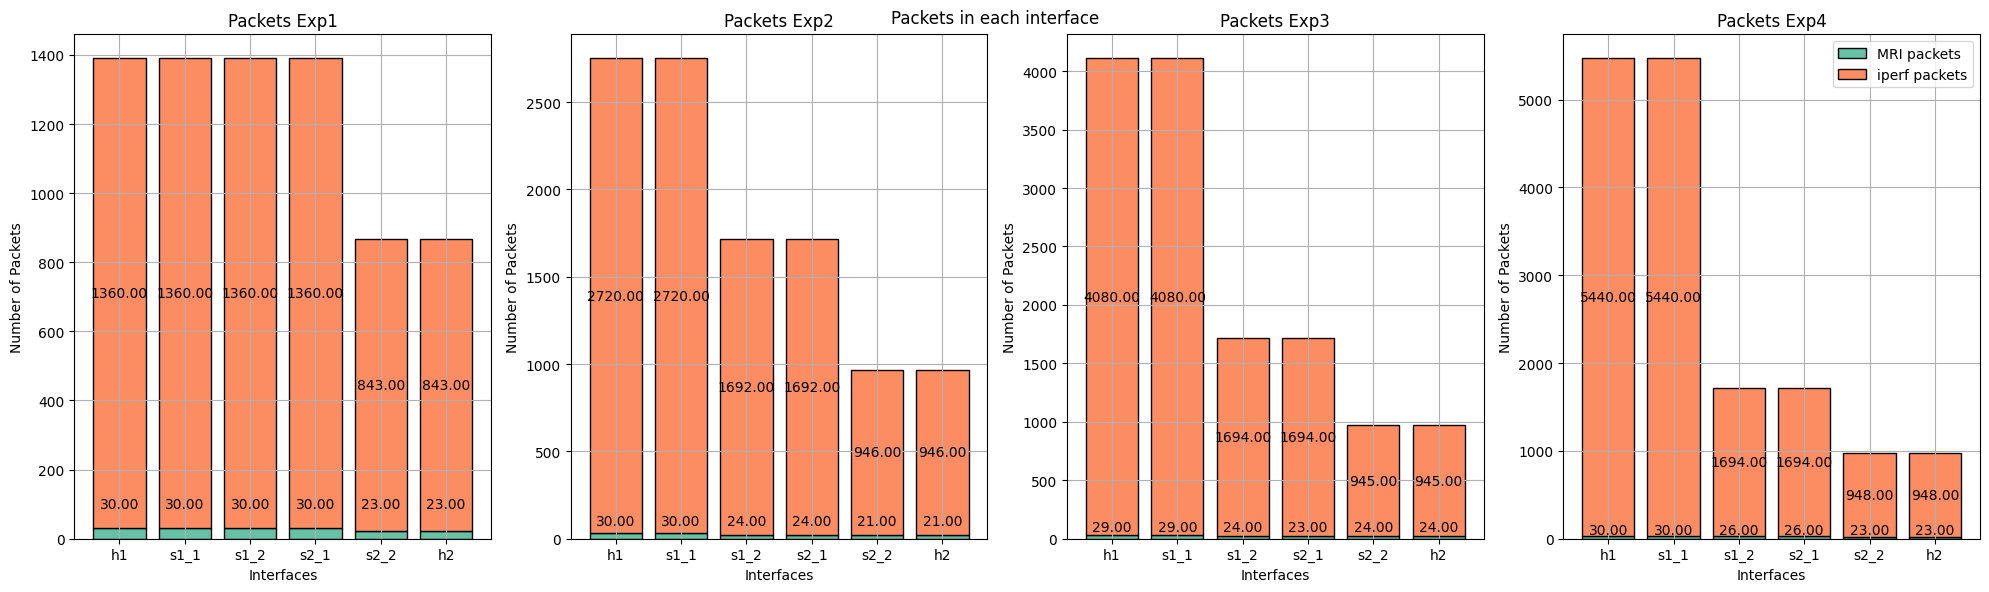

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 6))
for experiment in range(1, 5):
    file_path = f'./graphs/iperf/exp2{experiment}_nH.csv'
    dfh = pd.read_csv(file_path)
    
    file_path = f'./graphs/iperf/exp2{experiment}_nS1.csv'
    dfs1 = pd.read_csv(file_path)
    
    file_path = f'./graphs/iperf/exp2{experiment}_nS2.csv'
    dfs2 = pd.read_csv(file_path)
    
    h1_MRI = dfh.iloc[0]['h1_MRI']
    h1_iperf = dfh.iloc[0]['h1_iperf']
    h2_MRI = dfh.iloc[0]['h2_MRI']
    h2_iperf = dfh.iloc[0]['h2_iperf']
    
    s1_1_MRI = dfs1.iloc[0]['s11_MRI']
    s1_1_iperf = dfs1.iloc[0]['s11_iperf']
    s1_2_MRI = dfs1.iloc[0]['s12_MRI']
    s1_2_iperf = dfs1.iloc[0]['s12_iperf']
    
    s2_1_MRI = dfs2.iloc[0]['s21_MRI']
    s2_1_iperf = dfs2.iloc[0]['s21_iperf']
    s2_2_MRI = dfs2.iloc[0]['s22_MRI']
    s2_2_iperf = dfs2.iloc[0]['s22_iperf']

    plt.subplot(1, 4, experiment)
    labels = ["MRI packets", "iperf packets"]
    legend_labels = set()
    cmap = plt.get_cmap('Set2')
    colors = [cmap(0), cmap(1)]

    bottom = 0
    for packets, label, color in zip([h1_MRI, h1_iperf], labels, colors):
        bar = plt.bar(1, packets, bottom=bottom, color=color, edgecolor='black')
        if label == "MRI packets":
            plt.text(1, bottom + 100, f'{packets:.2f}', ha='center', va='center', color='black')
        if label == "iperf packets":
            plt.text(1, bottom + packets / 2, f'{packets:.2f}', ha='center', va='center', color='black')
        if label not in legend_labels:
            legend_labels.add(label)
            bar.set_label(label)
        bottom += packets
    
    bottom = 0
    for packets, label, color in zip([s1_1_MRI, s1_1_iperf], labels, colors):
        bar = plt.bar(2, packets, bottom=bottom, color=color, edgecolor='black')
        if label == "MRI packets":
            plt.text(2, bottom + 100, f'{packets:.2f}', ha='center', va='center', color='black')
        if label == "iperf packets":
            plt.text(2, bottom + packets / 2, f'{packets:.2f}', ha='center', va='center', color='black')
        if label not in legend_labels:
            legend_labels.add(label)
            bar.set_label(label)
        bottom += packets
    
    bottom = 0
    for packets, label, color in zip([s1_2_MRI, s1_2_iperf], labels, colors):
        bar = plt.bar(3, packets, bottom=bottom, color=color, edgecolor='black')
        if label == "MRI packets":
            plt.text(3, bottom + 100, f'{packets:.2f}', ha='center', va='center', color='black')
        if label == "iperf packets":
            plt.text(3, bottom + packets / 2, f'{packets:.2f}', ha='center', va='center', color='black')
        if label not in legend_labels:
            legend_labels.add(label)
            bar.set_label(label)
        bottom += packets
    
    bottom = 0
    for packets, label, color in zip([s2_1_MRI, s2_1_iperf], labels, colors):
        bar = plt.bar(4, packets, bottom=bottom, color=color, edgecolor='black')
        if label == "MRI packets":
            plt.text(4, bottom + 100, f'{packets:.2f}', ha='center', va='center', color='black')
        if label == "iperf packets":
            plt.text(4, bottom + packets / 2, f'{packets:.2f}', ha='center', va='center', color='black')
        if label not in legend_labels:
            legend_labels.add(label)
            bar.set_label(label)
        bottom += packets
    
    bottom = 0
    for packets, label, color in zip([s2_2_MRI, s2_2_iperf], labels, colors):
        bar = plt.bar(5, packets, bottom=bottom, color=color, edgecolor='black')
        if label == "MRI packets":
            plt.text(5, bottom + 100, f'{packets:.2f}', ha='center', va='center', color='black')
        if label == "iperf packets":
            plt.text(5, bottom + packets / 2, f'{packets:.2f}', ha='center', va='center', color='black')
        if label not in legend_labels:
            legend_labels.add(label)
            bar.set_label(label)
        bottom += packets
    
    bottom = 0
    for packets, label, color in zip([h2_MRI, h2_iperf], labels, colors):
        bar = plt.bar(6, packets, bottom=bottom, color=color, edgecolor='black')
        if label == "MRI packets":
            plt.text(6, bottom + 100, f'{packets:.2f}', ha='center', va='center', color='black')
        if label == "iperf packets":
            plt.text(6, bottom + packets / 2, f'{packets:.2f}', ha='center', va='center', color='black')
        if label not in legend_labels:
            legend_labels.add(label)
            bar.set_label(label)
        bottom += packets
    
    plt.xticks([1, 2, 3, 4, 5, 6], ['h1', 's1_1', 's1_2', 's2_1', 's2_2', 'h2'])
    plt.ylabel('Number of Packets')
    plt.xlabel('Interfaces')
    plt.title(f'Packets Exp{experiment}')
    plt.grid(True)

plt.legend()
plt.tight_layout()
plt.suptitle('Packets in each interface')
plt.savefig('./graphs/figures/nP_exp20.png')
plt.show()